In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib as plt 
import  csv
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from model_code import run_model

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn import tree
from sklearn import metrics


from sklearn.metrics import accuracy_score


import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
from sklearn.metrics import plot_confusion_matrix

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from imblearn.pipeline import Pipeline as IMBPipeline

from imblearn.over_sampling import SMOTE

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head(10)


Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Self Employed           Yes        700000   
4   28  Private Sector/Self Employed           Yes        700000   
5   25  Private Sector/Self Employed            No       1150000   
6   31             Government Sector           Yes       1300000   
7   31  Private Sector/Self Employed           Yes       1350000   
8   28  Private Sector/Self Employed           Yes       1450000   
9   33             Government Sector           Yes        800000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   
6              4                0            No                  No   
7              3                0           Yes                 Yes   
8              6                1           Yes                 Yes   
9              3                0           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0  
6                0  
7                1  
8                1  
9                0

In [3]:
y = df.pop('TravelInsurance')
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42)


In [4]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)    
    cnf_matrix_test = confusion_matrix(y_test,  y_pred_test)

    print('Confusion Matrix for Test Set:\n', cnf_matrix_test)
   
    cnf_matrix_train = confusion_matrix(y_train,  y_pred_train)
    print('Confusion Matrix for Train Set:\n', cnf_matrix_train)
 
    print('Classification Report for Test Set:\n',classification_report(y_test , y_pred_test))
    print('Classification Report for Train Set:\n',classification_report(y_train, y_pred_train))
    
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues)
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues)
    
   
    return model 

Basemodels with Smote 

Confusion Matrix for Test Set:
 [[225  32]
 [ 51  90]]
Confusion Matrix for Train Set:
 [[858 162]
 [191 378]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84       257
           1       0.74      0.64      0.68       141

    accuracy                           0.79       398
   macro avg       0.78      0.76      0.76       398
weighted avg       0.79      0.79      0.79       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1020
           1       0.70      0.66      0.68       569

    accuracy                           0.78      1589
   macro avg       0.76      0.75      0.76      1589
weighted avg       0.78      0.78      0.78      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('lr', LogisticRegression())])

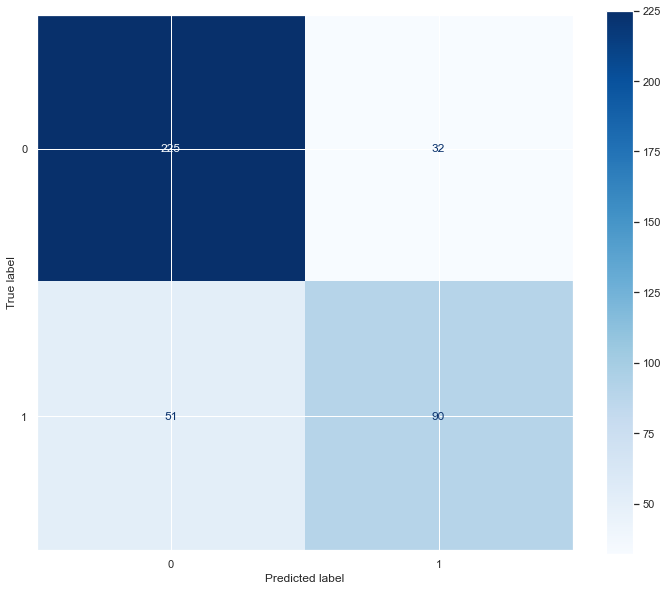

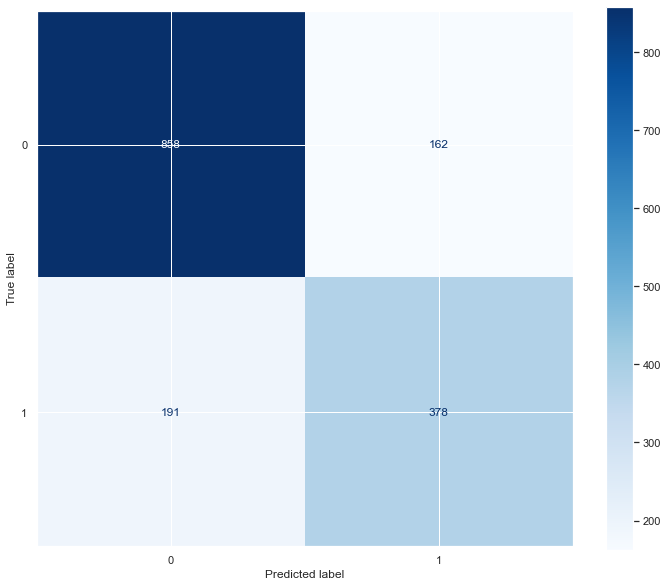

In [5]:
lr_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression())
])

run_model(lr_base_pipeline, X_train, X_test, y_train, y_test)   

Confusion Matrix for Test Set:
 [[200  57]
 [ 48  93]]
Confusion Matrix for Train Set:
 [[858 162]
 [105 464]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       257
           1       0.62      0.66      0.64       141

    accuracy                           0.74       398
   macro avg       0.71      0.72      0.72       398
weighted avg       0.74      0.74      0.74       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      1020
           1       0.74      0.82      0.78       569

    accuracy                           0.83      1589
   macro avg       0.82      0.83      0.82      1589
weighted avg       0.84      0.83      0.83      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('knn', KNeighborsClassifier())])

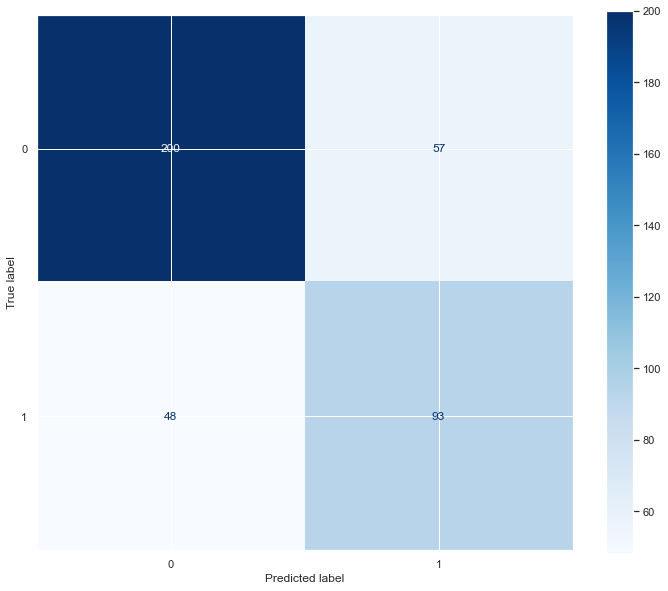

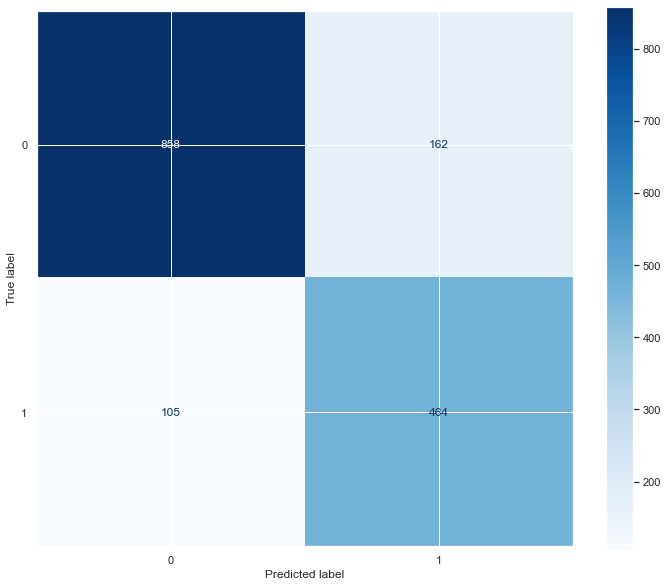

In [7]:
knn_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('knn', KNeighborsClassifier())
])

run_model(knn_base_pipeline, X_train, X_test, y_train, y_test) 



Confusion Matrix for Test Set:
 [[256   1]
 [ 78  63]]
Confusion Matrix for Train Set:
 [[1001   19]
 [ 318  251]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       257
           1       0.98      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.88      0.72      0.74       398
weighted avg       0.84      0.80      0.78       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86      1020
           1       0.93      0.44      0.60       569

    accuracy                           0.79      1589
   macro avg       0.84      0.71      0.73      1589
weighted avg       0.82      0.79      0.76      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('nb', GaussianNB())])

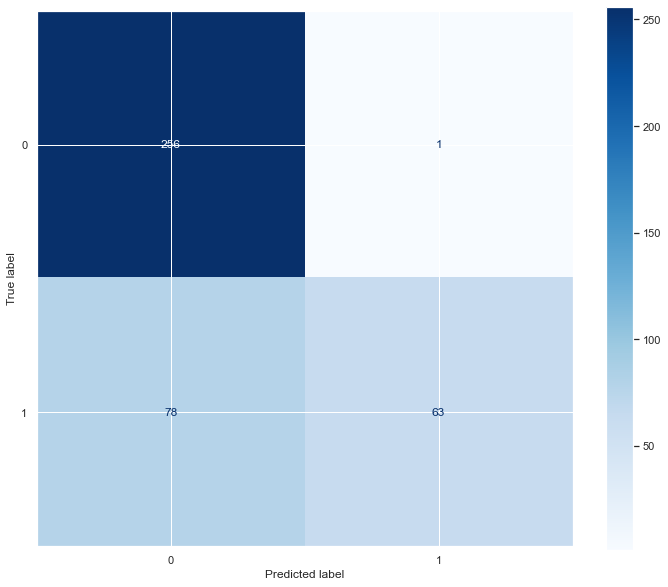

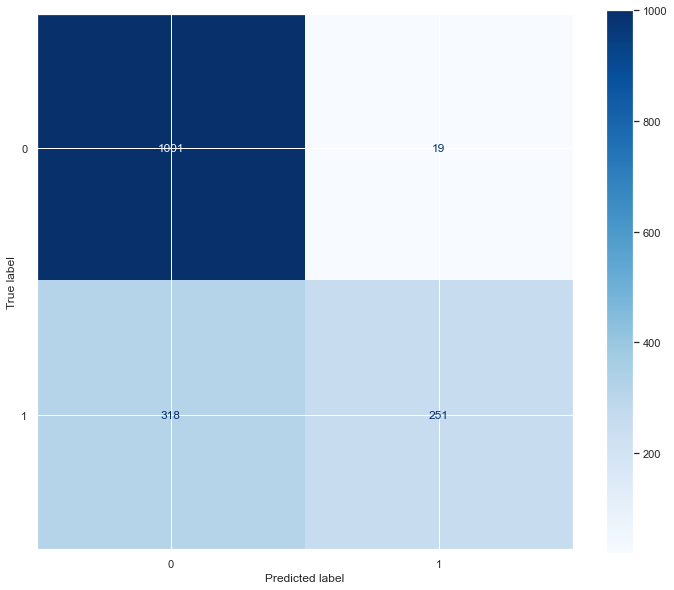

In [10]:
nb_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('nb', GaussianNB())
])

run_model(nb_base_pipeline, X_train, X_test, y_train, y_test) 


Confusion Matrix for Test Set:
 [[217  40]
 [ 50  91]]
Confusion Matrix for Train Set:
 [[996  24]
 [100 469]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       257
           1       0.69      0.65      0.67       141

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.75       398
weighted avg       0.77      0.77      0.77       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1020
           1       0.95      0.82      0.88       569

    accuracy                           0.92      1589
   macro avg       0.93      0.90      0.91      1589
weighted avg       0.92      0.92      0.92      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('dt', DecisionTreeClassifier())])

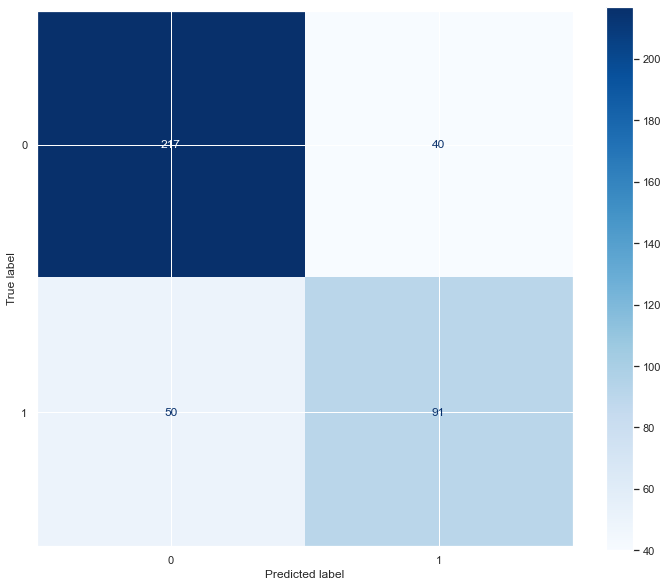

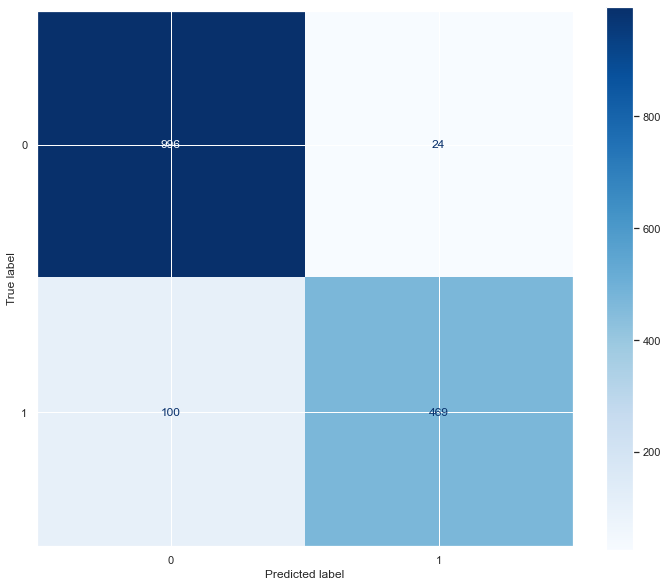

In [11]:
dt_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('dt', DecisionTreeClassifier())
])

run_model(dt_base_pipeline, X_train, X_test, y_train, y_test) 


Confusion Matrix for Test Set:
 [[226  31]
 [ 54  87]]
Confusion Matrix for Train Set:
 [[972  48]
 [ 76 493]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       257
           1       0.74      0.62      0.67       141

    accuracy                           0.79       398
   macro avg       0.77      0.75      0.76       398
weighted avg       0.78      0.79      0.78       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1020
           1       0.91      0.87      0.89       569

    accuracy                           0.92      1589
   macro avg       0.92      0.91      0.91      1589
weighted avg       0.92      0.92      0.92      1589



Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('rf', RandomForestClassifier())])

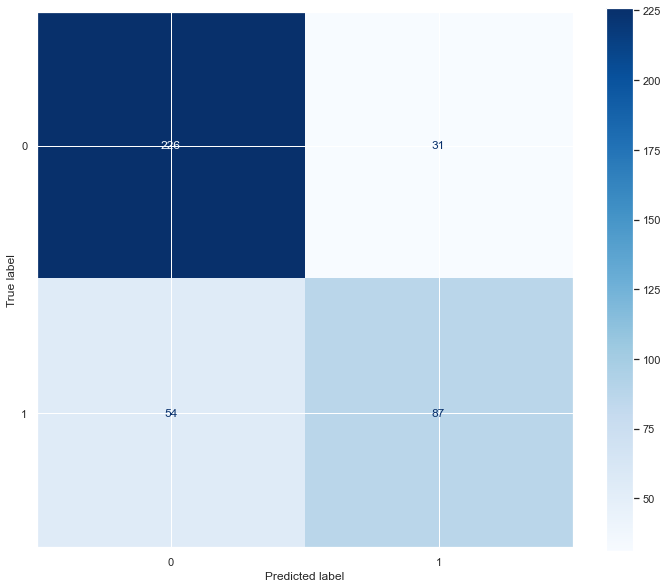

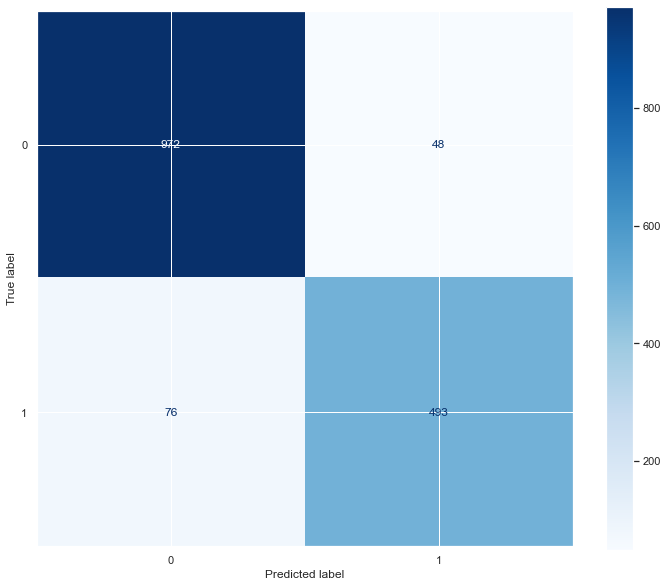

In [13]:
rf_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])

run_model(rf_base_pipeline, X_train, X_test, y_train, y_test) 


[14:29:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for Test Set:
 [[241  16]
 [ 52  89]]
Confusion Matrix for Train Set:
 [[983  37]
 [144 425]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       257
           1       0.85      0.63      0.72       141

    accuracy                           0.83       398
   macro avg       0.84      0.78      0.80       398
weighted avg       0.83      0.83      0.82       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1020
           1       0.92      0.75      0.82       569

    accuracy                           0.89      1589
   macro avg     

Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse=False)),
                ('ss', StandardScaler()), ('smote', SMOTE()),
                ('xg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

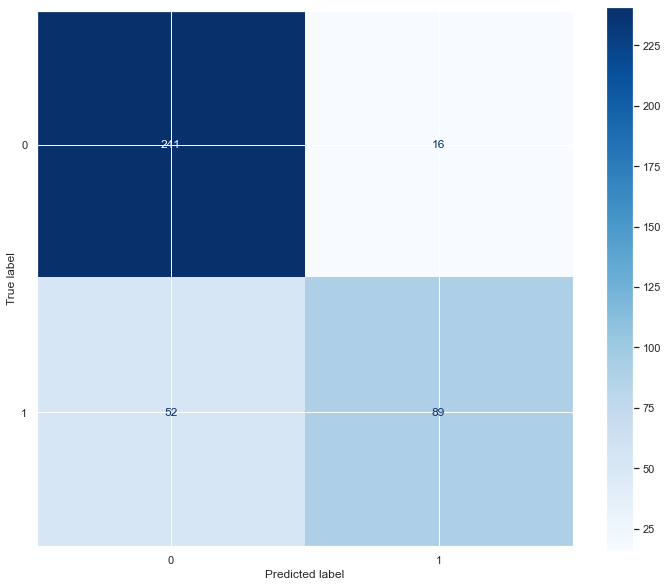

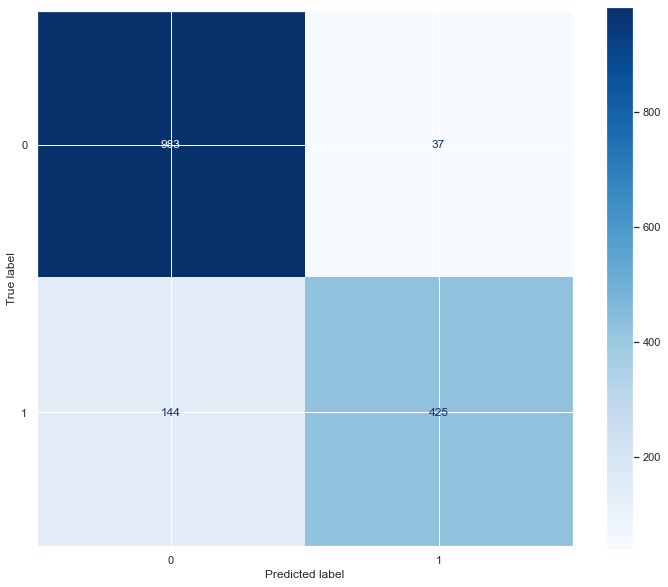

In [14]:
xg_base_pipeline = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False)),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('xg', XGBClassifier())
])

run_model(xg_base_pipeline, X_train, X_test, y_train, y_test) 


gridsearch models with smote 

Confusion Matrix for Test Set:
 [[225  32]
 [ 50  91]]
Confusion Matrix for Train Set:
 [[870 150]
 [201 368]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       257
           1       0.74      0.65      0.69       141

    accuracy                           0.79       398
   macro avg       0.78      0.76      0.77       398
weighted avg       0.79      0.79      0.79       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1020
           1       0.71      0.65      0.68       569

    accuracy                           0.78      1589
   macro avg       0.76      0.75      0.75      1589
weighted avg       0.78      0.78      0.78      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse=False)),
                                       ('ss', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': (0.01, 0.1, 1, 10),
                         'lr__fit_intercept': (True, False)})

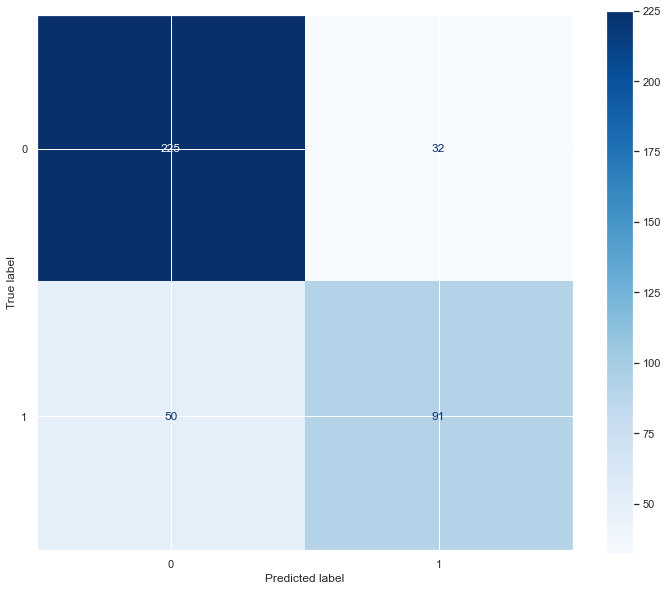

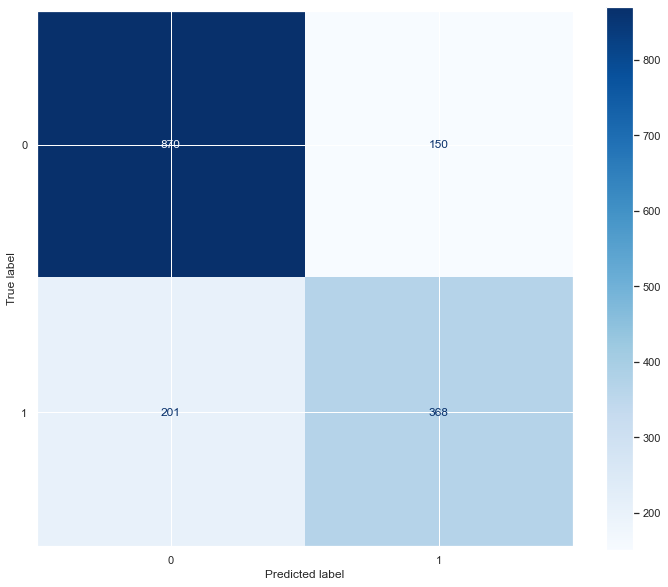

In [19]:
model_pipe_lr = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False,
                         handle_unknown='ignore')),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression())
])
pipe_grid_lr = {'lr__C': (0.01, 0.1, 1, 10),
    'lr__fit_intercept': (True, False)}

gs_pipe_lr = GridSearchCV(estimator=model_pipe_lr, param_grid=pipe_grid_lr,cv=5)
run_model(gs_pipe_lr, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[228  29]
 [ 57  84]]
Confusion Matrix for Train Set:
 [[901 119]
 [146 423]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       257
           1       0.74      0.60      0.66       141

    accuracy                           0.78       398
   macro avg       0.77      0.74      0.75       398
weighted avg       0.78      0.78      0.78       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1020
           1       0.78      0.74      0.76       569

    accuracy                           0.83      1589
   macro avg       0.82      0.81      0.82      1589
weighted avg       0.83      0.83      0.83      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse=False)),
                                       ('ss', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2, 3]})

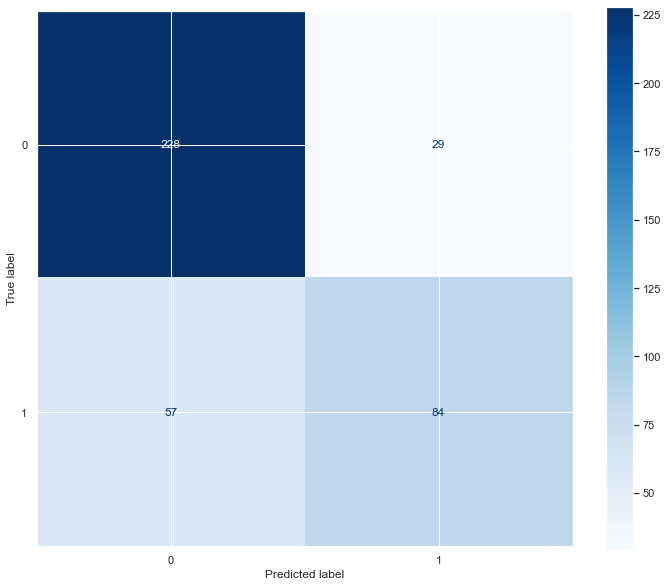

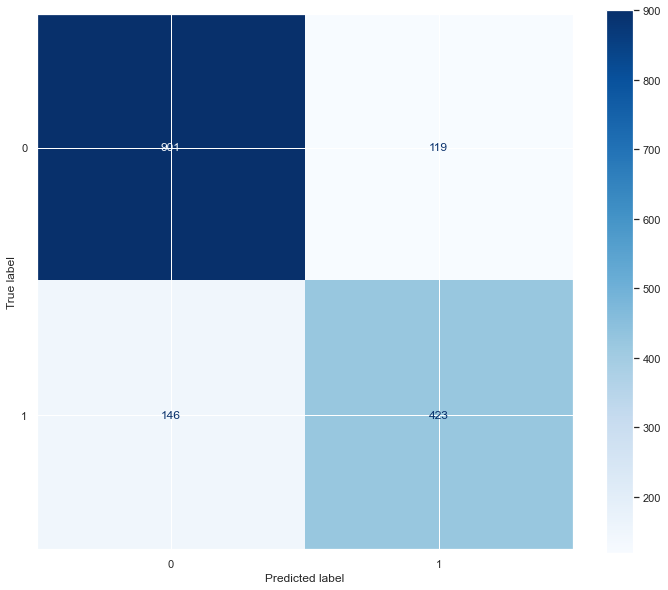

In [20]:
model_pipe_knn = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False,
                         handle_unknown='ignore')),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('knn', KNeighborsClassifier())
])
pipe_grid_knn = {'knn__n_neighbors': [3, 5, 7], 'knn__p': [1, 2, 3]}

gs_pipe_knn = GridSearchCV(estimator=model_pipe_knn, param_grid=pipe_grid_knn,cv=5)
run_model(gs_pipe_knn, X_train, X_test, y_train, y_test)

Confusion Matrix for Test Set:
 [[240  17]
 [ 64  77]]
Confusion Matrix for Train Set:
 [[976  44]
 [207 362]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       257
           1       0.82      0.55      0.66       141

    accuracy                           0.80       398
   macro avg       0.80      0.74      0.76       398
weighted avg       0.80      0.80      0.78       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1020
           1       0.89      0.64      0.74       569

    accuracy                           0.84      1589
   macro avg       0.86      0.80      0.81      1589
weighted avg       0.85      0.84      0.83      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse=False)),
                                       ('ss', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [None, 2, 6, 10],
                         'dt__min_samples_split': [5, 10]})

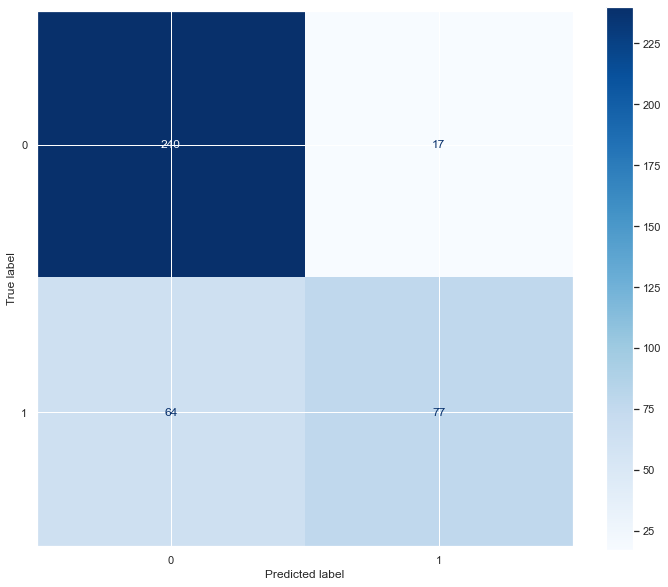

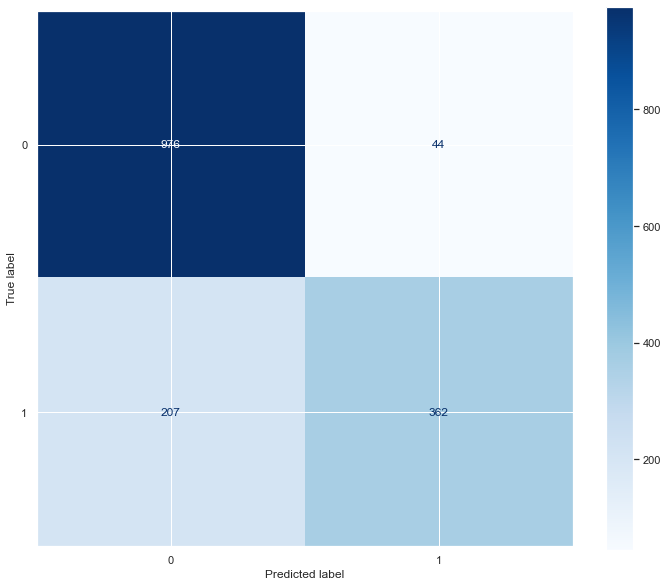

In [21]:
model_pipe_dt = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False,
                         handle_unknown='ignore')),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('dt', DecisionTreeClassifier())
])
pipe_grid_dt = {'dt__max_depth': [None, 2, 6, 10], 'dt__min_samples_split': [5, 10]}

gs_pipe_dt = GridSearchCV(estimator=model_pipe_dt, param_grid=pipe_grid_dt,cv=5)
run_model(gs_pipe_dt, X_train, X_test, y_train, y_test)


Confusion Matrix for Test Set:
 [[235  22]
 [ 58  83]]
Confusion Matrix for Train Set:
 [[977  43]
 [218 351]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       257
           1       0.79      0.59      0.67       141

    accuracy                           0.80       398
   macro avg       0.80      0.75      0.76       398
weighted avg       0.80      0.80      0.79       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88      1020
           1       0.89      0.62      0.73       569

    accuracy                           0.84      1589
   macro avg       0.85      0.79      0.81      1589
weighted avg       0.84      0.84      0.83      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse=False)),
                                       ('ss', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': [2, 3, 5, 10],
                         'rf__max_features': ['log2', 'sqrt', 'auto'],
                         'rf__min_samples_leaf': [1, 5, 8],
                         'rf__min_samples_split': [2, 3, 5],
                         'rf__n_estimators': [4, 6, 9]})

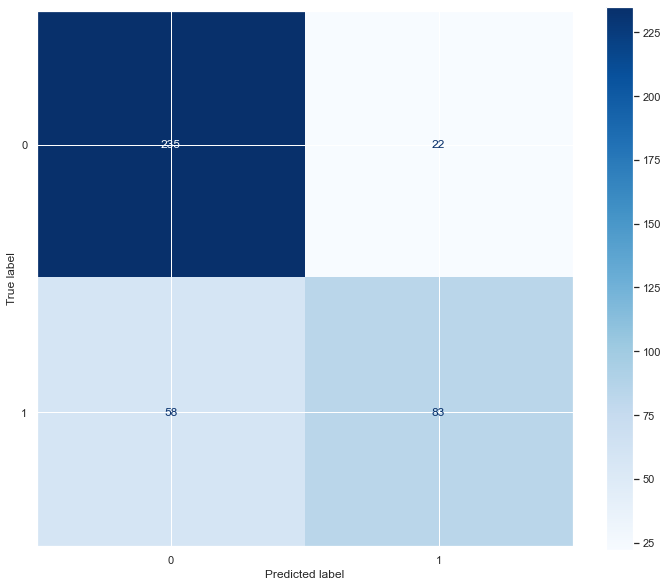

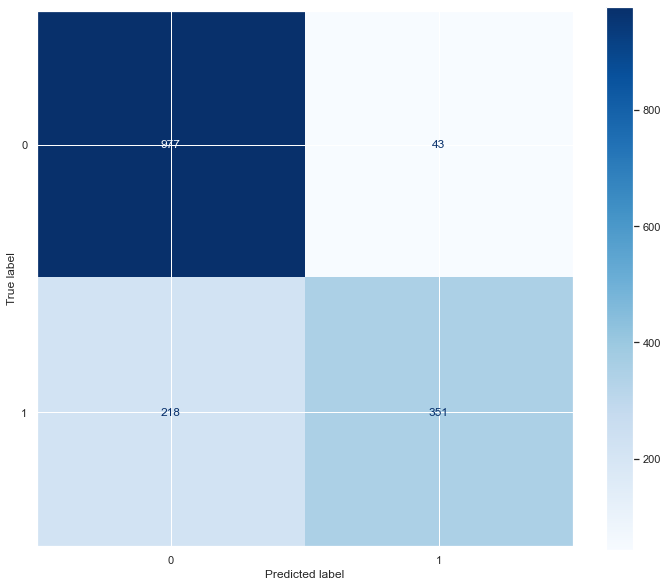

In [22]:
model_pipe_rf = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False,
                         handle_unknown='ignore')),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier())
])
pipe_grid_rf = {'rf__n_estimators': [4, 6, 9], 
              'rf__max_features': ['log2', 'sqrt','auto'],
              'rf__criterion': ['entropy', 'gini'], 
              'rf__max_depth': [2, 3, 5, 10], 
              'rf__min_samples_split': [2, 3, 5],
              'rf__min_samples_leaf': [1,5,8] }

gs_pipe_rf = GridSearchCV(estimator=model_pipe_rf, param_grid=pipe_grid_rf,cv=5)
run_model(gs_pipe_rf, X_train, X_test, y_train, y_test)

[17:14:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i


[17:14:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__a

[17:14:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i


[17:14:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__a

[17:14:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:14:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:14:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:14:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:15:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:15:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:16:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:16:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:17:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:17:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:18:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:18:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:19:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:19:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:20:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:20:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:20:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim


[17:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:21:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:21:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim


[17:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, 

[17:22:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:22:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:23:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:23:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:24:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:25:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:25:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:25:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:26:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:27:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:27:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:28:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:28:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:28:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:28:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:28:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:28:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim


[17:28:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:28:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:28:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:28:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim

[17:29:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:29:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:29:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:29:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:29:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:29:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:29:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:30:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:30:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:30:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:30:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:30:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:33] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:30:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:30:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:30:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:30:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:31:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:32:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:32:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:32:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:33:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:33:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:34:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:34:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:40] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:35:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:35:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:35:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:15] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:36:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:36:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:36:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:37:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:01] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:37:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:37:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i

[17:37:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue i


[17:37:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:37:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:37:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:28] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:37:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim


[17:37:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:31] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:35] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:38] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:42] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:45] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estim


[17:37:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:47] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:37:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:49] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:52] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:54] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:37:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:37:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:37:59] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:10] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:38:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:38:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:17] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:38:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:19] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:38:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:38:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:22] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:38:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:38:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:24] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:26] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:38:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:38:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:32] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:34] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:36] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:37] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:39] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:41] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:43] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:44] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:46] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:48] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:50] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:51] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:53] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:55] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:56] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:57] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:38:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:38:58] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:39:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:00] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti


[17:39:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:02] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:39:03] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:04] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:05] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:39:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:06] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:07] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:39:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:08] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o


[17:39:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:09] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__esti

[17:39:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:11] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:12] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:13] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:14] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:16] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:18] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:20] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:21] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:23] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:25] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:27] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:29] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

[17:39:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:39:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:39:30] WARNING: ..\src\learner.cc:541: 
Parameters: { base__score, gamma, learning__rate, n__estimators, reg__alpha, reg__lambda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please o

Confusion Matrix for Test Set:
 [[243  14]
 [ 58  83]]
Confusion Matrix for Train Set:
 [[993  27]
 [205 364]]
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87       257
           1       0.86      0.59      0.70       141

    accuracy                           0.82       398
   macro avg       0.83      0.77      0.78       398
weighted avg       0.82      0.82      0.81       398

Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      1020
           1       0.93      0.64      0.76       569

    accuracy                           0.85      1589
   macro avg       0.88      0.81      0.83      1589
weighted avg       0.87      0.85      0.85      1589



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse=False)),
                                       ('ss', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
   

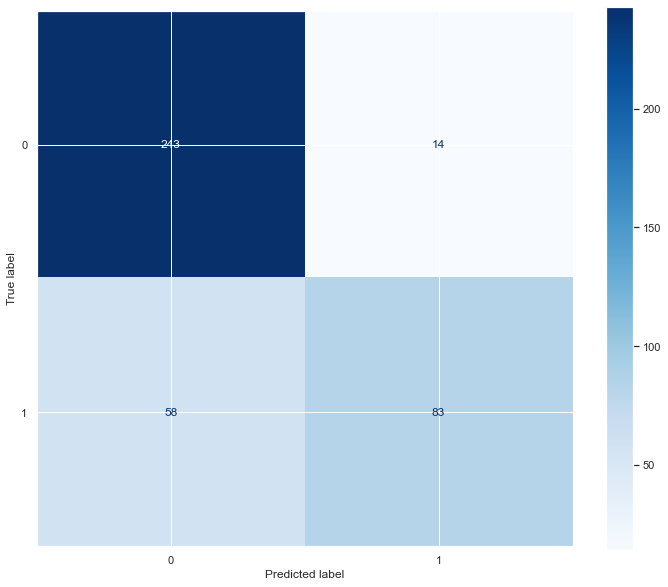

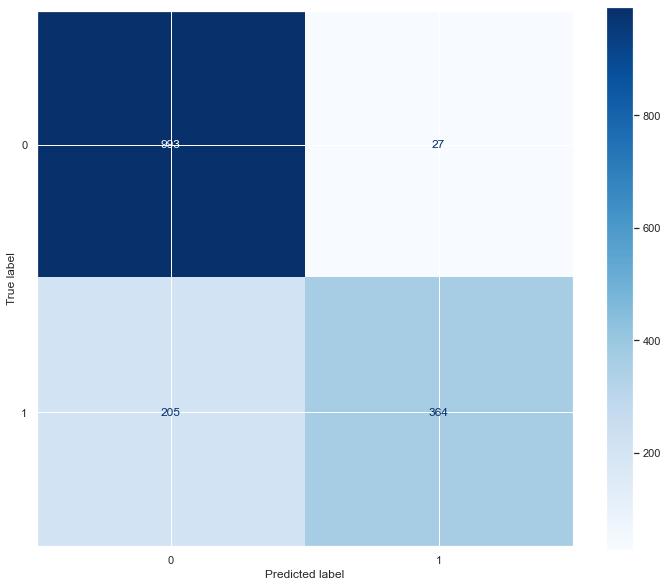

In [35]:
model_pipe_xg = IMBPipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False,
                         handle_unknown='ignore')),
    ('ss', StandardScaler()),
    ('smote', SMOTE()),
    ('xg', XGBClassifier())
])
pipe_grid_rf = {'xg__booster': ['gbtree', 'gblinear'],
                 'xg__n__estimators': [100, 200, 500],
                'xg__learning__rate': [0.01,0.05,0.1],
                'xg__booster': ['gbtree', 'gblinear'],
                'xg__gamma': [0, 0.5, 1],
                'xg__reg__alpha': [0, 0.5, 1],
                'xg__reg__lambda': [0.5, 1, 5],
                'xg__base__score': [0.2, 0.5, 1]}

gs_pipe_xg = GridSearchCV(estimator=model_pipe_xg, param_grid=pipe_grid_xg,cv=5)
run_model(gs_pipe_xg, X_train, X_test, y_train, y_test)

In [36]:
feature_importance=gs_pipe_xg.best_estimator_.named_steps['xg'].feature_importances_
list(zip(feature_importance, X_train.columns))

[(0.007266642, 'Age'),
 (0.009696806, 'Employment Type'),
 (0.01220812, 'GraduateOrNot'),
 (0.033828016, 'AnnualIncome'),
 (0.0097304955, 'FamilyMembers'),
 (0.009149443, 'ChronicDiseases'),
 (0.016206222, 'FrequentFlyer'),
 (0.0060771694, 'EverTravelledAbroad')]